480


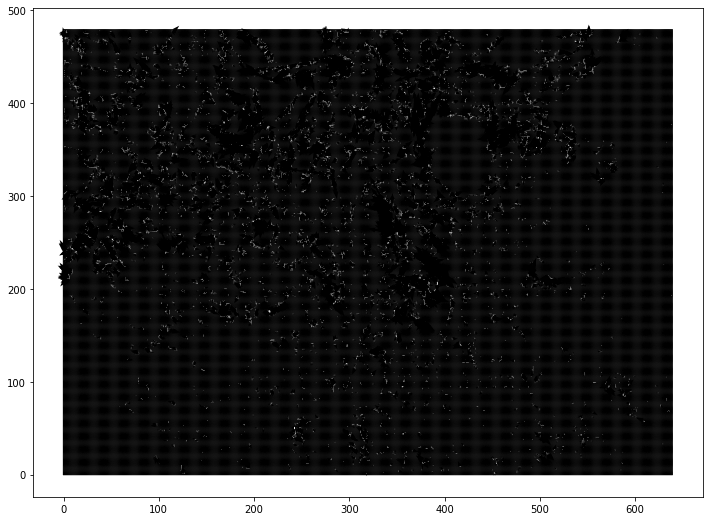

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def lucas_kanade(img1, img2, window_size=3):
    # Compute image gradients using Sobel filter
    Ix = cv2.Sobel(img2, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)    # ddpeth is like data type
    Iy = cv2.Sobel(img2, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

    # Initialize displacement arrays u and v with the same shape as inputs
    u = np.zeros(img1.shape)
    v = np.zeros(img1.shape)
    
    half_window = window_size // 2
    print(img1.shape[0])
    h = img1.shape[1]
    w = img1.shape[0]
    for i in range(half_window,  w - half_window):
        for j in range(half_window, h - half_window):
            # Extract the window from both images
            I1_window = img1[i-half_window:i+half_window+1, j-half_window:j+half_window+1]
            I2_window = img2[i-half_window:i+half_window+1, j-half_window:j+half_window+1]
            
            # Compute error image(f_t)
            error = I1_window - I2_window
            
            # Compute gradients in the window
            Ix_window = Ix[i-half_window:i+half_window+1, j-half_window:j+half_window+1]
            Iy_window = Iy[i-half_window:i+half_window+1, j-half_window:j+half_window+1]

            # Formulate A and b
            A = np.vstack((Ix_window.flatten(), Iy_window.flatten())).T
            b = -error.flatten()

            # Solve for displacement using the pseudo-inverse
            nu = np.linalg.pinv(A).dot(b)

            # Update the displacement
            u[i, j] += nu[0]
            v[i, j] += nu[1]
            
    return u, v


# Read the images
img1 = cv2.imread('Q2\Q2-1.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
img2 = cv2.imread('Q2\Q2-2.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

# Ensure the images are of the same size
assert img1.shape == img2.shape, "Input images must have the same dimensions"

u, v = lucas_kanade(img1, img2)


# Plot the displacement fields
plt.figure(figsize=(4*3,3*3))
plt.quiver(u, v)
plt.show()